In [89]:
from sentence_transformers import SentenceTransformer 
from PIL import Image #to open images
import glob
import os
import json
from annoy import AnnoyIndex #Checks for similarity of vectors

In [90]:
cwd = os.getcwd()
print(cwd)

d:\Github\video-content-search\src


In [93]:
files = glob.glob("../output/_All2/*.jpg")
len(files)

img_list = []
filename_list = []

for file in files:
    img = Image.open(file)
    img_list.append(img.copy())
    img.close()
    filename = os.path.basename(file)
    filename_list.append(filename)
    
len(img_list)


10080

In [ ]:
model = SentenceTransformer('clip-ViT-B-32')

In [96]:
embeddings = model.encode(img_list, batch_size=32)
len(embeddings) #Amount of pictures
embeddings.shape #Number of embeddings

print(filename_list)
data = {name: emb.tolist() for name, emb in zip(filename_list, embeddings)}

with open("embeddings.json", "w") as f:
    json.dump(data, f, indent=2)


['00001.mp4_0_1500.jpg', '00001.mp4_1_0.jpg', '00001.mp4_1_1750.jpg', '00001.mp4_2_1000.jpg', '00001.mp4_2_1250.jpg', '00001.mp4_2_2000.jpg', '00001.mp4_2_2250.jpg', '00001.mp4_2_2500.jpg', '00001.mp4_2_3000.jpg', '00001.mp4_2_3750.jpg', '00001.mp4_2_4000.jpg', '00001.mp4_2_4250.jpg', '00001.mp4_2_4500.jpg', '00001.mp4_2_4750.jpg', '00001.mp4_2_500.jpg', '00001.mp4_2_5250.jpg', '00001.mp4_2_5500.jpg', '00001.mp4_3_0.jpg', '00001.mp4_3_6500.jpg', '00001.mp4_3_6750.jpg', '00001.mp4_4_3500.jpg', '00001.mp4_5_5750.jpg', '00001.mp4_6_6250.jpg', '00001.mp4_7_750.jpg', '00001.mp4_8_3250.jpg', '00001.mp4_9_250.jpg', '00001.mp4_9_2750.jpg', '00001.mp4_9_5000.jpg', '00001.mp4_9_6000.jpg', '00002.mp4_0_1000.jpg', '00002.mp4_0_1250.jpg', '00002.mp4_0_1500.jpg', '00002.mp4_0_2750.jpg', '00002.mp4_0_3500.jpg', '00002.mp4_0_3750.jpg', '00002.mp4_0_4000.jpg', '00002.mp4_0_4250.jpg', '00002.mp4_0_500.jpg', '00002.mp4_0_5500.jpg', '00002.mp4_0_750.jpg', '00002.mp4_1_5000.jpg', '00002.mp4_1_6000.jpg', '0

In [97]:
annoy_index = AnnoyIndex(512, metric="angular" ) #Dimension and metric to compute distance
#Could also use cosine and more

for idx, embedding in enumerate(embeddings):
    annoy_index.add_item(idx, embedding) #Number of the index, actual embeddings
    
annoy_index.build(200)#Number of branches in your index 10, up to 100 200, the higher the more accurate, but will be a larger file

True

Query shape: (1, 512)
Most likely frames: [3228, 3368, 3250, 4468, 1588, 1751, 3398, 3237, 4444, 3148]


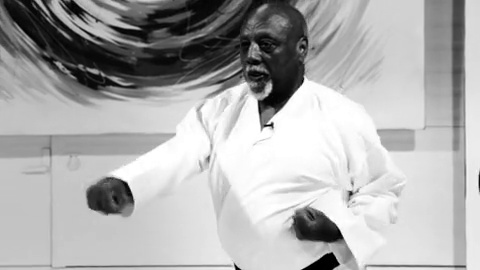

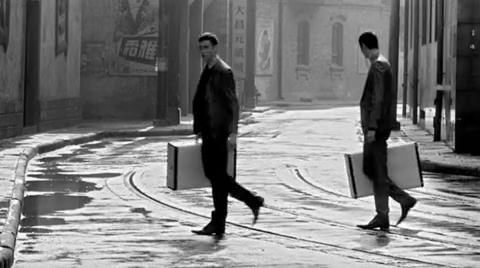

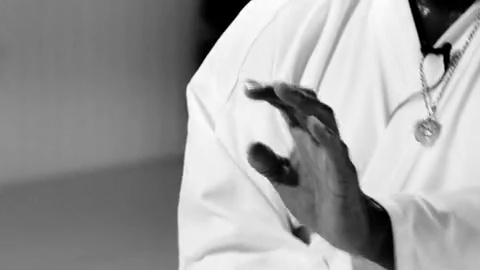

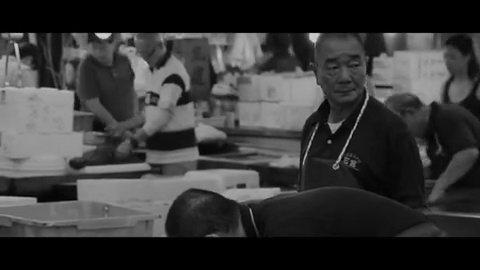

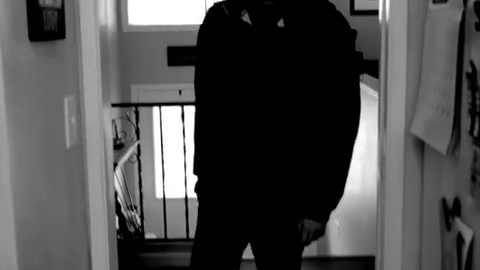

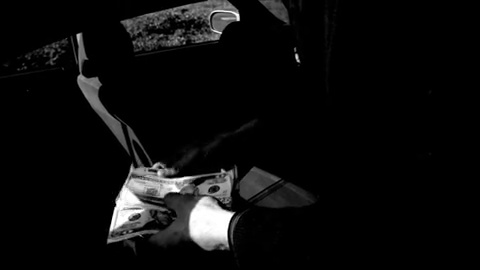

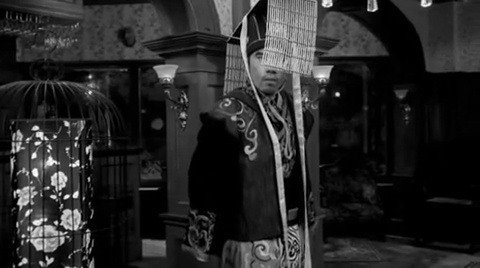

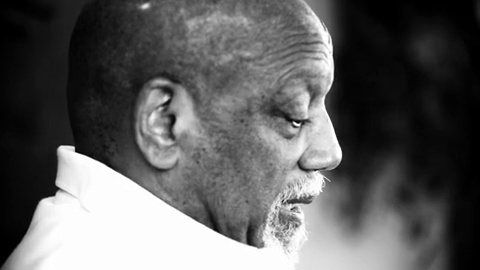

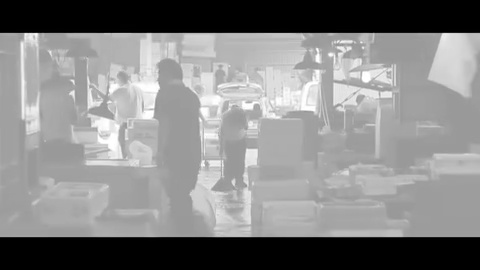

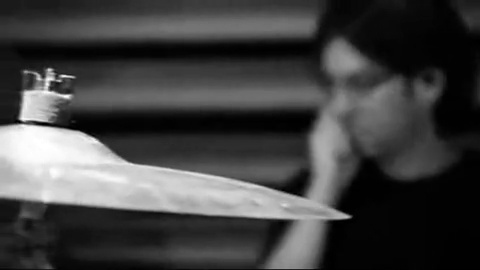

In [101]:
query_text = model.encode(["Man in black and white martial arts"])
print(f"Query shape: {query_text.shape}") #Text query encoded

result = annoy_index.get_nns_by_vector(query_text[0], 10) #nns = nearest neighbour. So five nearest neighbours
print(f"Most likely frames: {result}") #Image ID of most likely frame

for item in result:
    #print(item, print(files[item]))
    display(img_list[item])